In [1]:
import numpy as np
import emcee
from matplotlib import pyplot as plt
from os.path import join, abspath
from scipy.interpolate import interp1d
from scipy.integrate import simps
from os import pardir, mkdir
import sys
import vaex
import corner

In [2]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
data_baryon_dir = join(root_data_dir, "Baryon")
data_number_dir = join(root_data_dir, "Number-Density")
data_velocity_dir = join(root_data_dir, "Spectral-Class-Velocity")
data_comp_dir = join(root_data_dir, "Effective-Volume")
data_mcmc_dir = join(root_data_dir, "MCMC")
data_mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC'

In [4]:
tipe = "G"
filename = join(data_mcmc_dir, f"chain-{tipe}.h5")
readers = emcee.backends.HDFBackend(filename, name="mcmc_second_prior")

readers

Text(0.5, 0, 'step number')

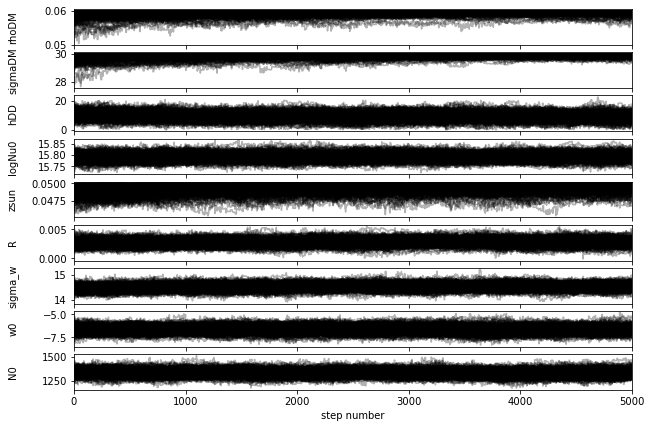

In [5]:
fig, axes = plt.subplots(9, figsize=(10, 7), sharex=True)
samples = readers.get_chain()
labels = ["rhoDM", "sigmaDM", "hDD", "logNu0", "zsun", "R", "sigma_w", "w0", "N0"]
for i in range(9):
    ax = axes[i]
    ax.plot(samples[:, :, i+24], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [6]:
flat_samples = readers.get_chain(flat=True)
flat_samples

array([[ 1.22522320e-02,  5.17016773e-02,  7.27284458e-03, ...,
         1.44661218e+01, -6.86173108e+00,  1.39951277e+03],
       [ 1.46273890e-02,  5.65999337e-02,  6.91219993e-03, ...,
         1.45308041e+01, -6.36408280e+00,  1.34818793e+03],
       [ 1.03306712e-02,  5.15150919e-02,  8.38143403e-03, ...,
         1.44654189e+01, -5.88818731e+00,  1.35111404e+03],
       ...,
       [ 7.11199772e-03,  4.86045370e-02,  8.15477856e-03, ...,
         1.44409164e+01, -7.07674306e+00,  1.30420733e+03],
       [ 1.06691880e-02,  5.94023257e-02,  7.99752939e-03, ...,
         1.44279135e+01, -7.02819023e+00,  1.30485789e+03],
       [ 1.98768205e-02,  5.16385838e-02,  8.45263395e-03, ...,
         1.43162768e+01, -6.10554551e+00,  1.37810988e+03]])

In [7]:
fig = corner.corner(
    flat_samples[:,23:], labels=["rhob", "rhoDM", "sigmaDD", "hDD", "logNu0", "zsun", "R", "sigma_w", "w0", "N0"],
)

In [8]:
df_number = vaex.open(join(data_number_dir, f"cum-{tipe}.hdf5"))
df_velocity = vaex.open(join(data_velocity_dir, f"{tipe}-type.hdf5"))
df_comp = vaex.open(join(data_comp_dir, "comp.hdf5"))

z = df_number.z.to_numpy()
w = df_velocity.w.to_numpy()
comp = df_comp[tipe].to_numpy()
zz = df_comp.z.to_numpy()
comp_z = interp1d(zz, comp, kind='cubic', fill_value='extrapolate')

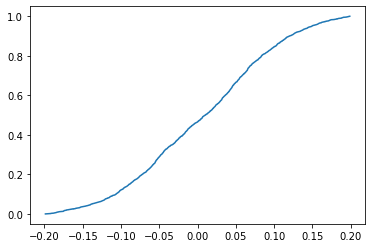

In [9]:
plt.plot(z, np.linspace(0, 1, len(z)), label="Number Density")

In [10]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

In [11]:
from utils import log_nu_mod

In [12]:
cek = np.sum(flat_samples[:, 0:12], axis=1)
cek.shape

(1500000,)

In [13]:
dict_mcmc = {
    "rho1": flat_samples[:, 0],
    "rho2": flat_samples[:, 1],
    "rho3": flat_samples[:, 2],
    "rho4": flat_samples[:, 3],
    "rho5": flat_samples[:, 4],
    "rho6": flat_samples[:, 5],
    "rho7": flat_samples[:, 6],
    "rho8": flat_samples[:, 7],
    "rho9": flat_samples[:, 8],
    "rho10": flat_samples[:, 9],
    "rho11": flat_samples[:, 10],
    "rho12": flat_samples[:, 11],
    "sigmaz1": flat_samples[:, 12],
    "sigmaz2": flat_samples[:, 13],
    "sigmaz3": flat_samples[:, 14],
    "sigmaz4": flat_samples[:, 15],
    "sigmaz5": flat_samples[:, 16],
    "sigmaz6": flat_samples[:, 17],
    "sigmaz7": flat_samples[:, 18],
    "sigmaz8": flat_samples[:, 19],
    "sigmaz9": flat_samples[:, 20],
    "sigmaz10": flat_samples[:, 21],
    "sigmaz11": flat_samples[:, 22],
    "sigmaz12": flat_samples[:, 23],
    "rhob": np.sum(flat_samples[:, 0:12], axis=1),
    "rhoDM": flat_samples[:, 24],
    "sigmaDD": flat_samples[:, 25],
    "hDD": flat_samples[:, 26], 
    "logNu0": flat_samples[:, 27], 
    "zsun": flat_samples[:, 28], 
    "R": flat_samples[:, 29], 
    "sigma_w": flat_samples[:, 30], 
    "w0": flat_samples[:, 31], 
    "N0": flat_samples[:, 32]
}
df_mcmc = vaex.from_dict(dict_mcmc)
df_mcmc

#,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,sigmaz1,sigmaz2,sigmaz3,sigmaz4,sigmaz5,sigmaz6,sigmaz7,sigmaz8,sigmaz9,sigmaz10,sigmaz11,sigmaz12,rhob,rhoDM,sigmaDD,hDD,logNu0,zsun,R,sigma_w,w0,N0
0,0.015754437359274218,0.03041204899826219,0.006133256069428747,0.00044565761728163734,0.0006004931715740726,0.0014885555426269708,0.0019688393620314664,0.002794792585925061,0.00778736342802393,0.025708301229964876,0.005403079542841711,0.0013285171751188864,3.7537205183939912,5.977908030886553,19.66757566968165,39.055578104709674,14.647605581029662,7.939859471431115,7.150556281813221,19.517676232297802,16.211615740487836,3.7949756169175295,15.018056008210191,14.51371693322265,0.09982534208235376,0.00038363048142280726,29.93679296650782,2.229079825762513,17.21921047570343,0.010069853222578161,0.003166295621156089,4.807799138987027,-7.193036189912823,162.5630655691526
1,0.01370169879952326,0.03434834610547287,0.0065488474390530405,0.0004911920544689399,0.0006317341669891419,0.0018659903821589131,0.0018520165520553085,0.002829301868120591,0.008514855197873289,0.02346628662846589,0.003979956402760521,0.0024557630948104517,3.9728393913676756,6.671489323982401,19.966359941415885,38.04758996728843,15.552036770102543,4.578032097563747,11.01565843272704,19.258068511707172,18.272586053089185,2.4004340317550223,15.66990109263135,19.131140505127657,0.10068598869175222,0.006042605979982707,29.770809006305896,2.698742979616433,17.184639820455423,0.01065832929125288,0.0034111788748213473,4.859964977942222,-6.3339873379775575,181.71534966680946
2,0.00819529597820673,0.03425166408201044,0.006648572081724742,0.0005690995883986418,0.0005466129400226642,0.0017673070658214857,0.0017459383869633924,0.0028853754188247573,0.0070592481081181895,0.02447401217410543,0.0066842618203139335,0.0013219754581412335,3.937017626067352,6.34396003837181,22.010050595545085,36.29294568228845,12.109542273353188,4.304310971232244,10.769336810710769,17.553385926622944,16.520324993744318,5.925600616801726,20.037496365789433,22.68430710485349,0.09614936310265164,0.0010384069844350703,29.82841630468959,3.352437672445343,17.117980278983282,0.01035365371410772,0.003920961507683991,4.8758448879419225,-6.97733958400278,194.9310628979403
3,0.014446939866944895,0.02835037446759006,0.0070996182163971175,0.000558655437193657,0.0004730430614531281,0.0016186661654449624,0.0019400244591911448,0.0033063464669415023,0.0063004059963163266,0.02701425047158853,0.005807056238316357,0.0012719713842732272,3.5535005346600395,6.521530399252619,19.77388784756584,41.94503631003488,14.11778531395046,7.296747175973726,8.065283388371608,19.07686563228735,16.33906003139415,4.817725954581726,18.646434479051177,26.49030462976023,0.0981873522316509,0.004730694250327166,29.432543358096066,0.023720089375987907,17.370837450464077,0.009701697970712915,0.003974561252910726,4.748671545378341,-6.578485954293359,185.7346623372652
4,0.013212273565184982,0.028113084708912193,0.005096328737261789,0.0005154296190186383,0.0006925281306553176,0.0016706813582901862,0.0015249509306299136,0.003090072263758035,0.007102512895731556,0.018649868125194743,0.007181964851132156,0.0017012317446853996,4.02444416067831,6.276453784033193,21.745273089241003,34.250655768891185,16.5688032036473,5.801567438058234,14.912401224836195,16.393534999129706,13.521853235895625,3.89604291977134,6.129262159888656,23.954326844627015,0.0885509269304549,0.001715565188132258,29.21519779146826,2.59432573242151,17.19705795235629,0.010883512295957872,0.004139255957162112,4.734214808184393,-6.125421862642386,165.16452580419022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,499,995",0.017745407230674734,0.021443944096682335,0.0063913242909018845,0.0005410334061885286,0.000591823550142446,0.0018943804019588189,0.0015276484988389102,0.002883881750578736,0.006769553948805614,0.027742344708634115,0.004958589134582413,0.001360626444760896,4.195513775

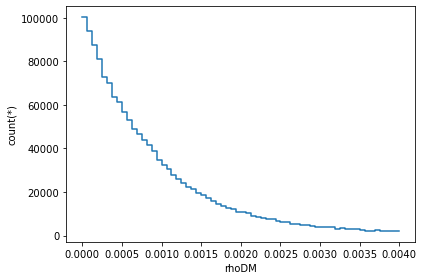

In [14]:
df_mcmc.viz.histogram("rhoDM", limits=[0, 0.004])

In [15]:
index = np.random.rand()*len(df_mcmc)
index

1118327.5393298795

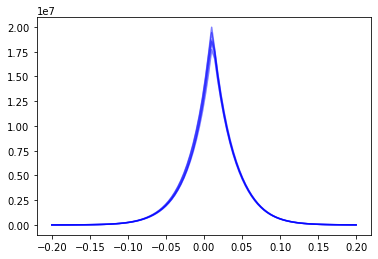

In [16]:
zz  = np.linspace(-0.2, 0.2, 100)
x = flat_samples
for i in range(5):
  index = int(np.floor(np.random.rand()*len(df_mcmc)))
  theta = dict(rhos=x[index, 0:12], sigmaz=x[index, 12:24], rhoDM=x[index, 24], sigmaDD=x[index, 25], 
               hDD=x[index, 26], logNu0=x[index, 27], zsun=x[index, 28], R=x[index, 29], sigma_w=x[index, 30], 
               w0=x[index, 31], N0=x[index, 32])
  logNu = log_nu_mod(zz, theta) + np.log(comp_z(zz))

  plt.plot(zz, np.exp(logNu), alpha=0.5, c="blue")

In [19]:
integral = simps(np.exp(logNu), zz)
nu = np.exp(logNu)/integral
nu_f = interp1d(zz, nu, kind='cubic', fill_value='extrapolate')
cdf = np.cumsum(nu_f(zz))

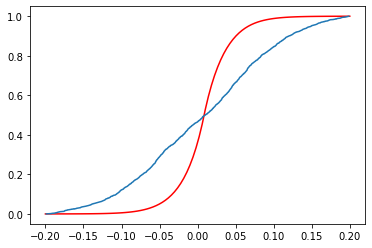

In [20]:
plt.plot(zz, cdf/np.max(cdf), c="red")
plt.plot(z, np.linspace(0, 1, len(z)), label="Number Density")